In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation

In [2]:
%run DMD_functions.ipynb 

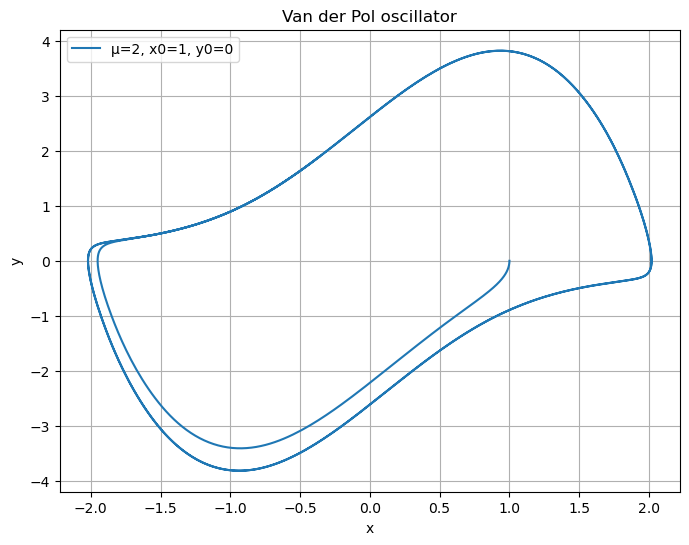

In [3]:
#Van der Pol oscillator system
initial_condition = (1,0)
mu = 2
t_span=(0,20)
t_eval = np.linspace(t_span[0], t_span[1], 2000)


def van_der_pol(t, state, mu):
    x, y = state
    dxdt = y
    dydt = mu * (1 - x**2) * y - x
    return [dxdt, dydt]


sol = solve_ivp(van_der_pol, t_span, [initial_condition[0], initial_condition[1]], args=(mu,), t_eval=t_eval, vectorized=True) #u sol.y[0] i sol.y[1] su (x,y) koordinate točke za svaki trenutak

#print(sol.y[0].shape, sol.y[1].shape)
#print(sol.t.shape)

plt.figure(figsize=(8,6))
plt.plot(sol.y[0], sol.y[1], label=f"μ={mu}, x0={initial_condition[0]}, y0={initial_condition[1]}")

    
plt.title("Van der Pol oscillator")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()



(2, 2000)


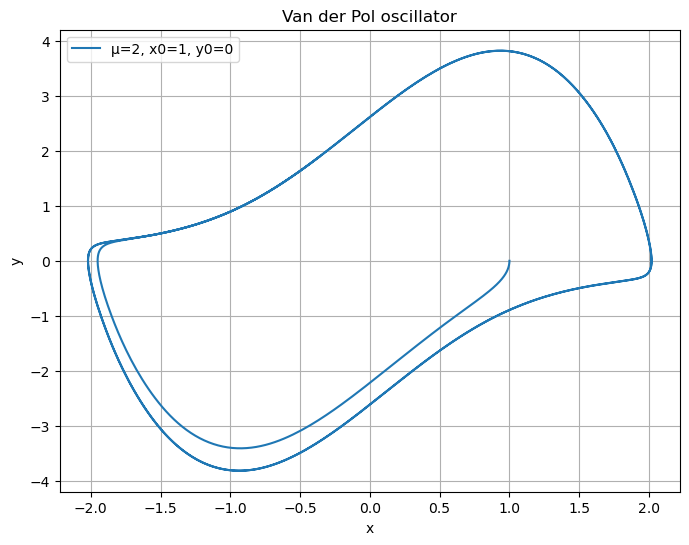

In [4]:
vdp = sol.y
print(vdp.shape)

plt.figure(figsize=(8, 6))
plt.plot(vdp[0,:], vdp[1,:], label=f"μ={mu}, x0={initial_condition[0]}, y0={initial_condition[1]}")

    
plt.title("Van der Pol oscillator")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

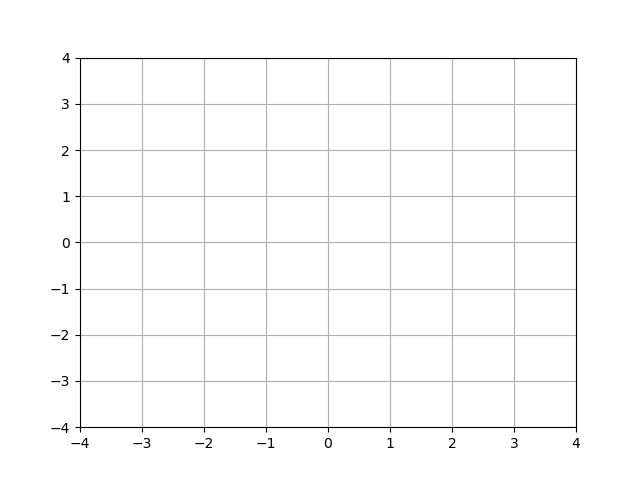

In [7]:
%matplotlib widget

fig, ax = plt.subplots()

line2 = ax.plot(vdp[0,0], vdp[1,0], lw=2)[0]
ax.set_xbound(-4,4); ax.set_ybound(-4,4)
plt.grid()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = vdp[0,:frame]
    y = vdp[1,:frame]
    # update the line plot:
    line2.set_xdata(x)
    line2.set_ydata(y)
    return (line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=vdp.shape[1], interval=20, blit=True, repeat=False)
plt.show()

In [6]:
%matplotlib inline

Ako ih ne "stackam" uvijek ću dobiti max dva moda (nakon svd-a,...)

In [8]:
vdp=sol.y
num_stack = 60
m=vdp.shape[1]
vdp_end=vdp[:,-num_stack:]
vdp = vdp[:,:(m-num_stack+1)]

for i in range(1,num_stack):
    added=np.concatenate((vdp[:2,i:], vdp[:2,:i]), axis=1)
    vdp=np.vstack((vdp,added))

In [9]:
#provjera jel dobro formirana matrica..

k=np.random.randint(num_stack, m-num_stack)
for i in range(1,num_stack):
    if(np.all(vdp[:2,k]==vdp[2*i:2*i+2,k-i])):
        print(True)
    else:
        print(False, vdp[:2,k],vdp[2*i:2*i+2,k-i])

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [10]:
m=vdp.shape[1]-1

Z, L = DMD(vdp[:,:m], vdp[:,1:(m+1)])
print(L.shape)

(120,)


In [11]:
Z, L, r, _, _ = GEDMDQ(vdp[:,:m+1])
print(L.shape)

(120,)


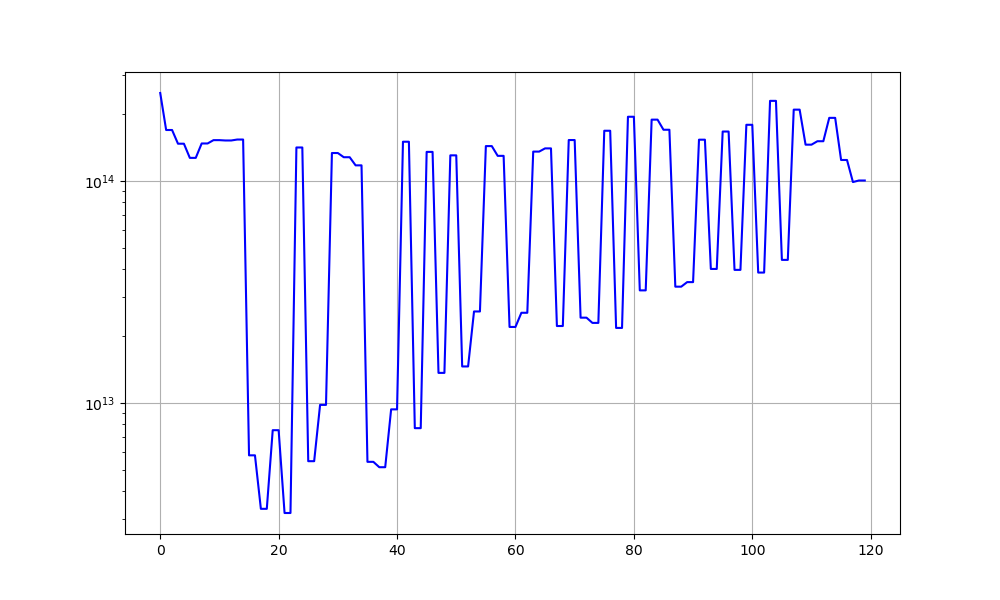

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(1/r, marker='', linestyle='-', color='b')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
plt.show()

In [13]:
threshold = 2*1e-14
indices = np.where(r<threshold)[0]
print(indices, indices.shape)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  23  24  29
  30  31  32  33  34  41  42  45  46  49  50  55  56  57  58  63  64  65
  66  69  70  75  76  79  80  83  84  85  86  91  92  95  96  99 100 103
 104 107 108 109 110 111 112 113 114 115 116 117 118 119] (68,)


In [14]:
times = [i for i in range(m-100,m+100)]

reconstructed = DMD_reconstruction(vdp[:,:1], Z, indices, L, times)

#lose!!!! 

**uzimamo dio oscilatora - iz toga procjena za dalje**


.

In [15]:
poc=500; zav=600; rec=50

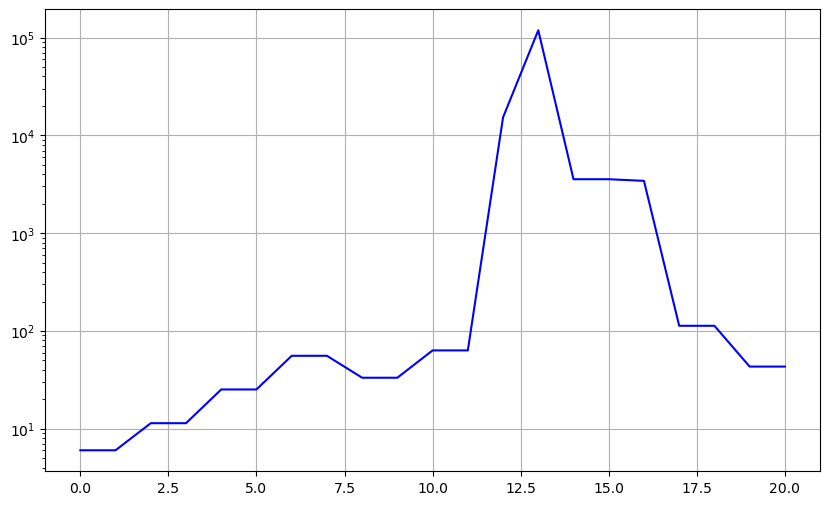

In [23]:
Z, L, r, _, _ = GEDMDQ(vdp[:,poc:zav], tol=1e-6)

plt.figure(figsize=(10, 6))
plt.plot(1/r, marker='', linestyle='-', color='b')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
plt.show()

In [24]:
threshold=1e-3
indices=np.where(r<threshold)[0]
indices.shape

###threshold se mijenja ovisno o tome koliko ih stackam!! 

(5,)

In [25]:
reconstructed = DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, [i for i in range(zav-poc+rec)])

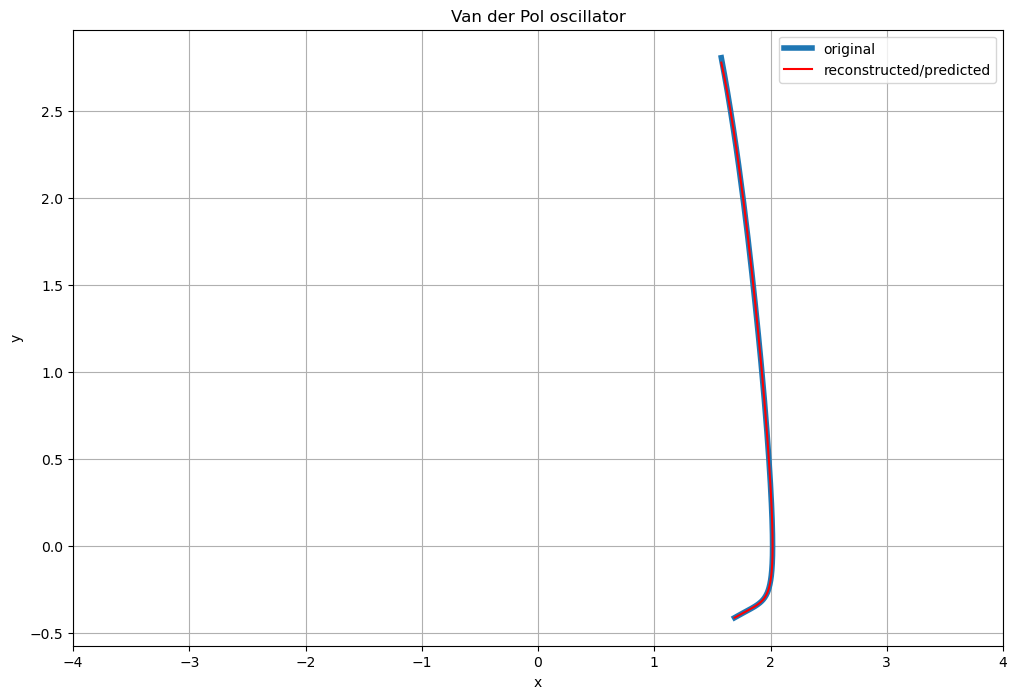

In [26]:
plt.figure(figsize=(12, 8))
plt.plot(vdp[0,poc:zav+rec], vdp[1,poc:zav+rec],lw=4, label=f"original")
plt.plot(reconstructed[0,:], reconstructed[1,:], label=f"reconstructed/predicted", color="red")

    
plt.title("Van der Pol oscillator")
plt.xlabel("x")
plt.xlim((-4,4))
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

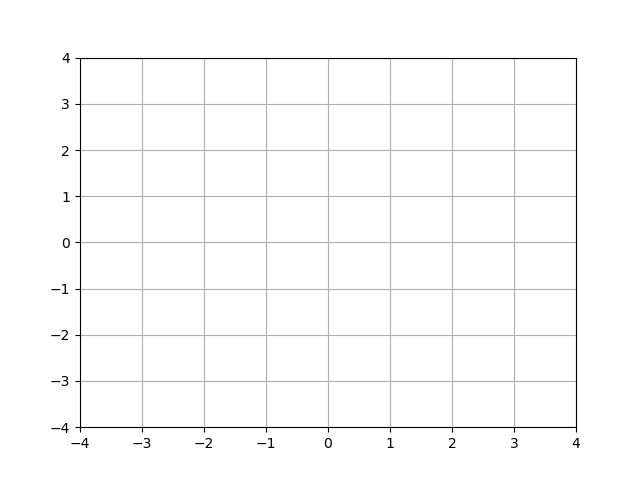

In [20]:
%matplotlib widget

fig, ax = plt.subplots()

line2 = ax.plot(vdp[0,poc], vdp[1,poc], lw=4, color="blue")[0]
line1 = ax.plot(reconstructed[0,0], reconstructed[1,0], lw=2, color="red")[0]
ax.set_xbound(-4,4); ax.set_ybound(-4,4)
plt.grid()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = vdp[0,poc:(poc+frame)]
    y = vdp[1,poc:(poc+frame)]
    x_r = reconstructed[0,:frame]
    y_r = reconstructed[1,:frame]
    # update the line plot:
    line2.set_xdata(x)
    line2.set_ydata(y)
    line1.set_xdata(x_r)
    line1.set_ydata(y_r)
    return (line2, line1)


ani = animation.FuncAnimation(fig=fig, func=update, frames=zav-poc+rec, interval=150, blit=True, repeat=False)
plt.show()

**adding and removing snapshots**


...

In [27]:
%matplotlib inline

(20,)
(22,)
(25,)
(22,)
(24,)
(23,)
(21,)
(23,)
(18,)
(20,)
(19,)
(18,)
(18,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(16,)
(14,)
(16,)
(16,)
(16,)
(14,)
(12,)
(12,)
(14,)
(12,)
(10,)
(7,)
(7,)
(7,)
(5,)
(7,)
(5,)
(5,)
(7,)
(7,)


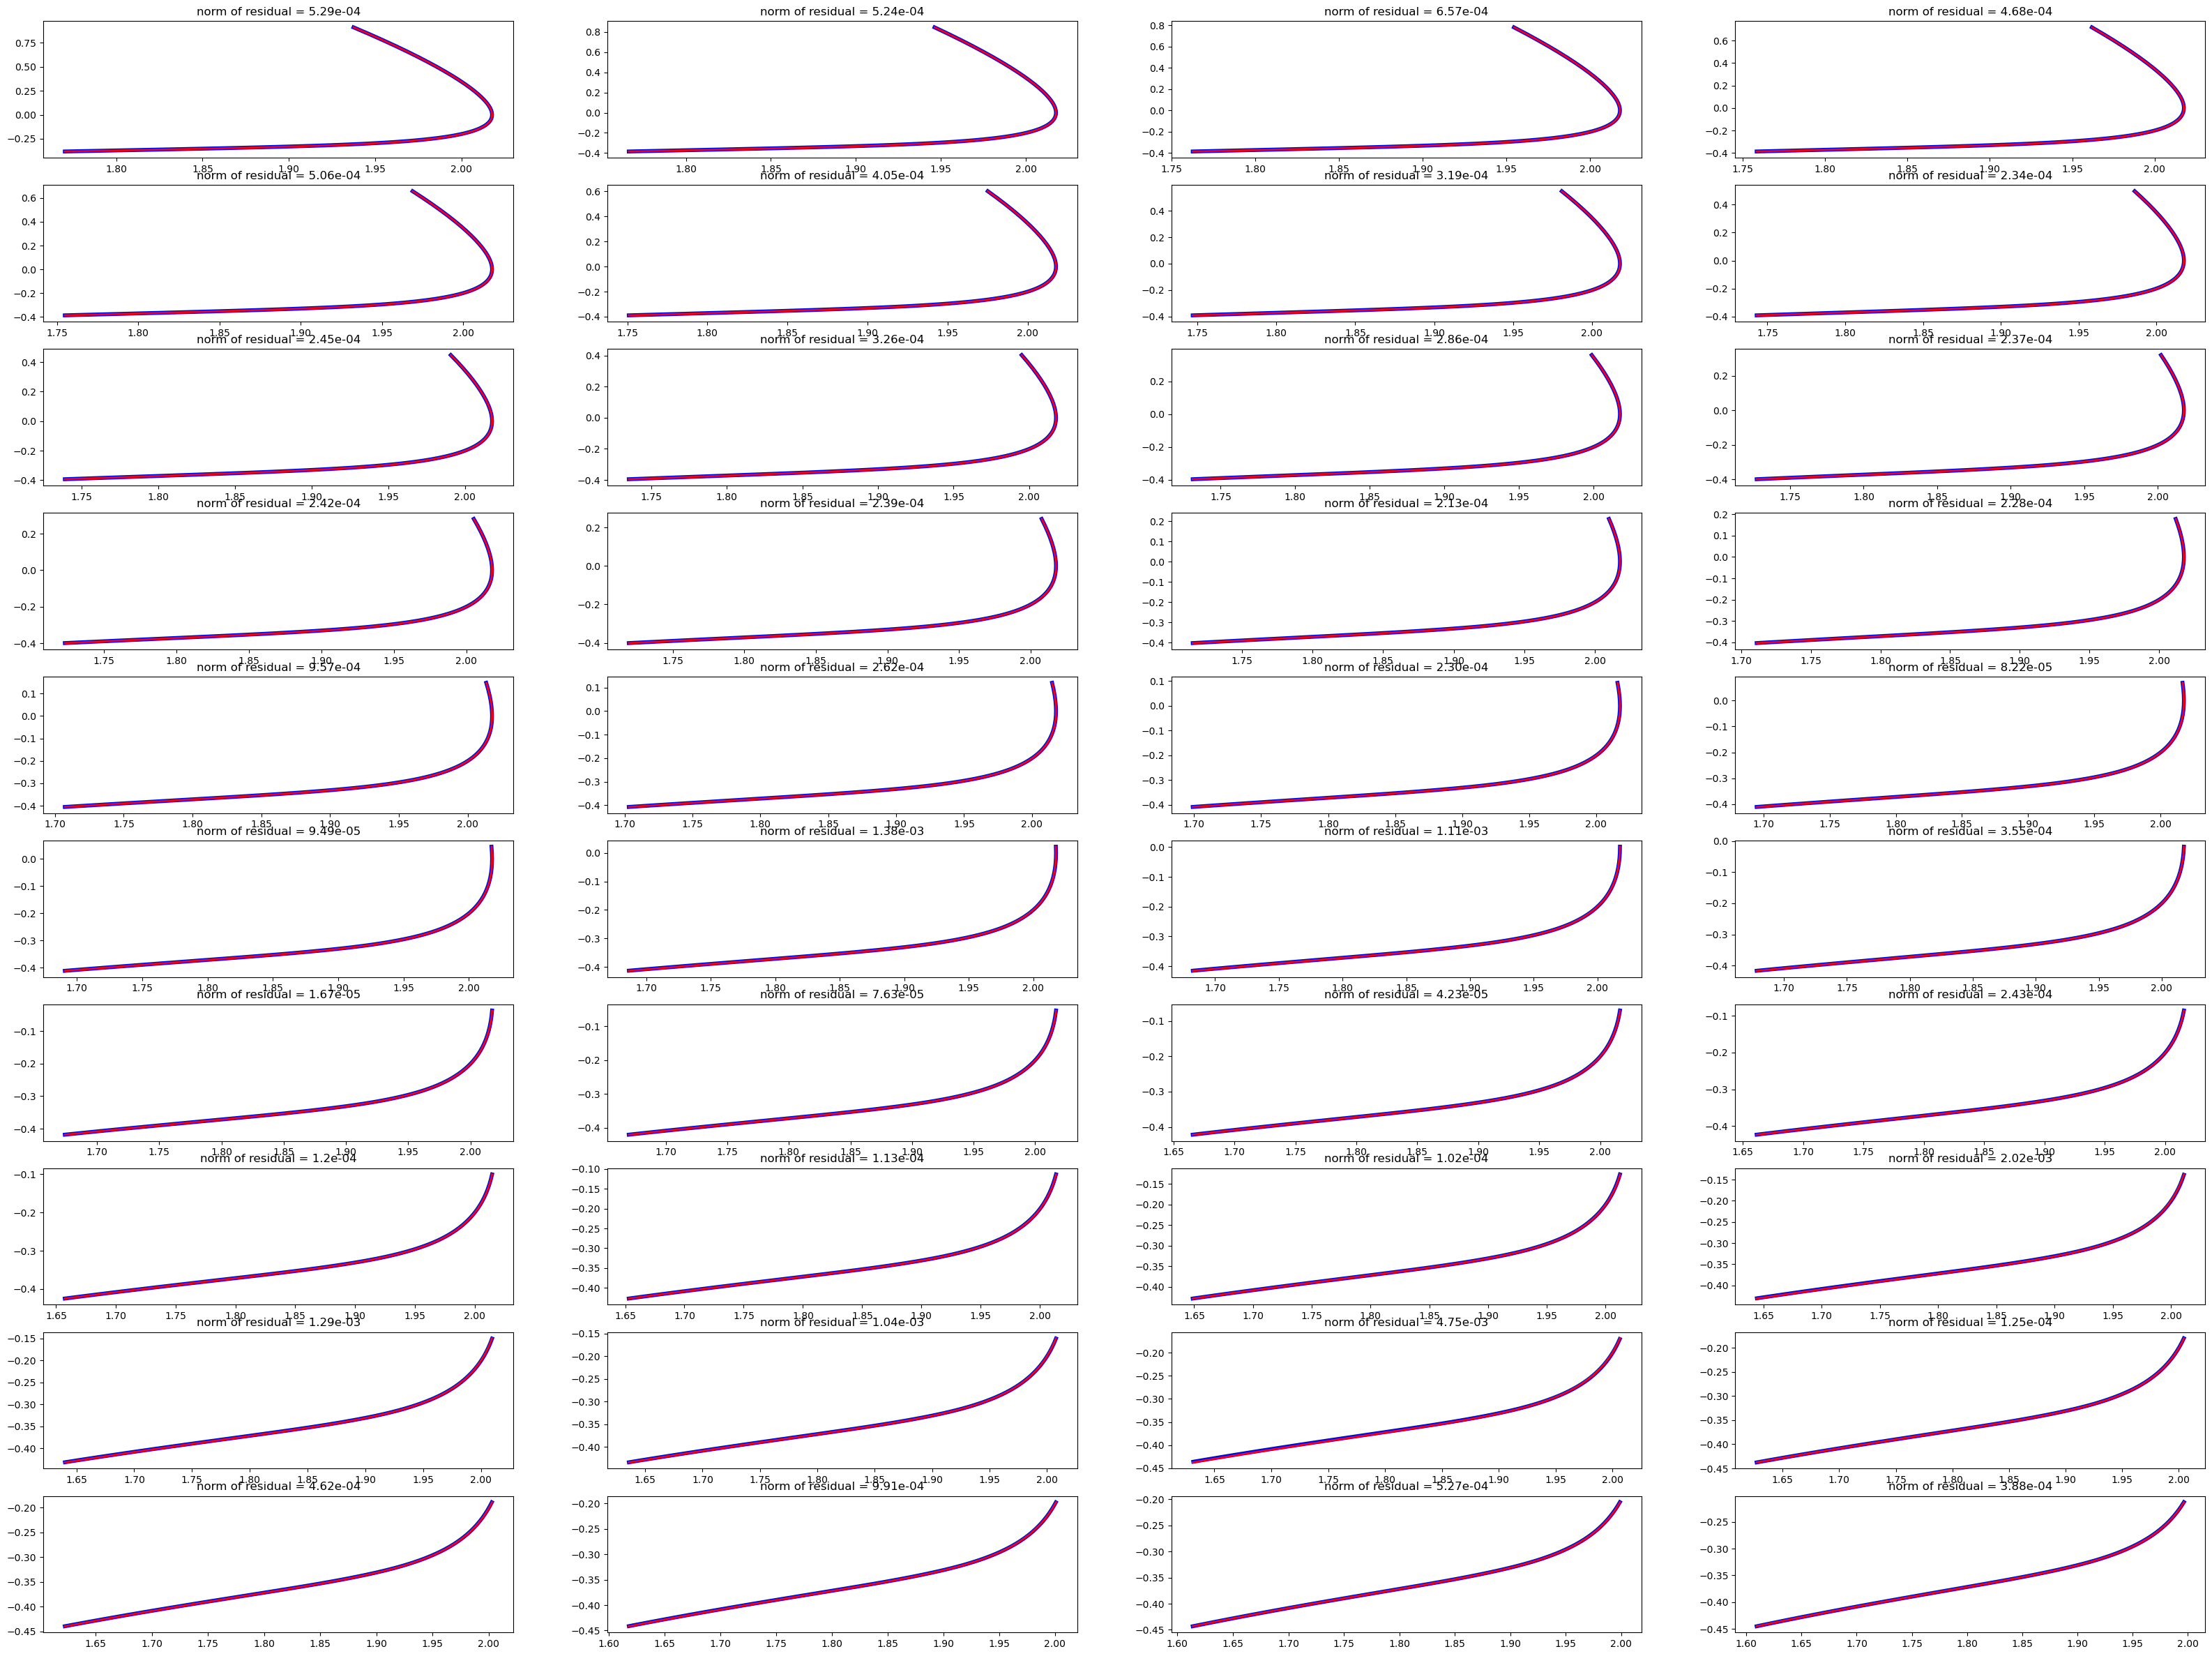

In [30]:
####################################################################################################################################
#           BEZ WEIGHTS
####################################################################################################################################


#dodajem 1
koliko_predvidam=10

poc=500; zav=600


koliko_x=10; koliko_y=4
fig, axs = plt.subplots(koliko_x, koliko_y, figsize=(40,30), squeeze=True)

Z, L, r, Q, R = GEDMDQ(vdp[:,poc:zav], tol=1e-6)

threshold=1e-2
indices = np.where(r < threshold)[0]
times=[i for i in range(zav-poc+koliko_predvidam)]
predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times)
#predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times, weights=weights)

axs[0,0].plot(vdp[-2, poc:zav+koliko_predvidam], vdp[-1,poc:zav+koliko_predvidam], color="blue", lw=4) ###koji predvidam? zadnji par ili prvi par??
axs[0,0].plot(predicted[-2,:], predicted[-1,:], color="red", lw=2)
res=np.linalg.norm(predicted[-2:,-koliko_predvidam:]-vdp[-2:,zav:zav+koliko_predvidam])
axs[0,0].set_title("norm of residual = {}".format(np.format_float_scientific(res, precision=2)))


br=0
for i in range(koliko_x):
    for j in range(koliko_y):
        if(i==0 and j==0):
            continue
        poc=poc+1; zav=zav+1
        _,_,_,Q,R,_ = DMD_discarding_snap(1, Q, R, tol=1e-6)
        
        Z, L, r, Q, R = DMD_added_snap(vdp[:,(zav-1):zav], Q, R, tol=1e-6)

        indices=np.where(r < threshold)[0]
        print(indices.shape)


        predicted = DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times)
        
        axs[i,j].plot(vdp[-2, poc:zav+koliko_predvidam], vdp[-1,poc:zav+koliko_predvidam], color="blue", lw=4)
        axs[i,j].plot(predicted[-2,:], predicted[-1,:], color="red", lw=2)
        res=np.linalg.norm(predicted[-2:,-koliko_predvidam:]-vdp[-2:,zav:zav+koliko_predvidam])
        axs[i,j].set_title("norm of residual = {}".format(np.format_float_scientific(res, precision=2)))
        threshold=1/50
    #ako norma res < 1e-1 npr. odsječi sve osim zadnjih k
        """if res > 1/50:
            poc=zav-50
            threshold = 1e-2
            """



###linalg warning - prije dodavanja - mozda provjeriti je li vec sadrzan... procjeriti u fji za Q.T @ B je li nesto "skoro" nula?...

###NAJBOLJI rezultati - weights prije nego biram modove..

In [ ]:
"""##nema razlike ako dodajem weights u dmd dio

#dodajem 1
koliko_predvidam=10

poc=500; zav=600

p=0.9
#weights = np.concatenate((np.array([p**i for i in range(zav-poc+koliko_predvidam-14,0,-1)]), np.ones(10)))
weights = np.concatenate((np.array([p**i for i in range(zav-poc-11,0,-1)]), np.ones(10)))
#weights = np.array([p**i for i in range(zav-poc-1,-1,-1)]).reshape(-1,1)
#weights = np.ones(zav-poc).reshape(-1,1)


koliko_x=10; koliko_y=4
fig, axs = plt.subplots(koliko_x, koliko_y, figsize=(40,30), squeeze=True)

Z, L, r, Q, R = GEDMDQ(vdp[:,poc:zav],weights=weights)

threshold=1
indices = np.where(r < threshold)[0]
times=[i for i in range(zav-poc+koliko_predvidam)]
predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times)
#predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times, weights=weights)

axs[0,0].plot(vdp[-2, poc:zav+koliko_predvidam], vdp[-1,poc:zav+koliko_predvidam], color="blue", lw=4) ###koji predvidam? zadnji par ili prvi par??
axs[0,0].plot(predicted[-2,:], predicted[-1,:], color="red", lw=2)
res=np.linalg.norm(predicted[-2:,-koliko_predvidam:]-vdp[-2:,zav:zav+koliko_predvidam])
axs[0,0].set_title("norm of residual = {}".format(np.format_float_scientific(res, precision=2)))


br=0
for i in range(koliko_x):
    for j in range(koliko_y):
        if(i==0 and j==0):
            continue
        poc=poc+1; zav=zav+1
        _,_,_,Q,R,_ = DMD_discarding_snap(1, Q, R, weights=weights[1:])
        
        Z, L, r, Q, R = DMD_added_snap(vdp[:,(zav-1):zav], Q, R, weights=weights)

        indices=np.where(r < threshold)[0]
        print(indices.shape)


        predicted = DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times)
        
        axs[i,j].plot(vdp[-2, poc:zav+koliko_predvidam], vdp[-1,poc:zav+koliko_predvidam], color="blue", lw=4)
        axs[i,j].plot(predicted[-2,:], predicted[-1,:], color="red", lw=2)
        res=np.linalg.norm(predicted[-2:,-koliko_predvidam:]-vdp[-2:,zav:zav+koliko_predvidam])
        axs[i,j].set_title("norm of residual = {}".format(np.format_float_scientific(res, precision=2)))
        threshold=1/50
    #ako norma res < 1e-1 npr. odsječi sve osim zadnjih k



###linalg warning - prije dodavanja - mozda provjeriti je li vec sadrzan... procjeriti u fji za Q.T @ B je li nesto "skoro" nula?...

"""